In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt 
from sklearn.datasets import fetch_california_housing

In [3]:
data= fetch_california_housing(as_frame=True)
housing_df=data.frame

In [ ]:
numerical_features=housing_df.select_dtypes(include=[np.number]).columns
n_features=len(numerical_features)
n_cols=3
n_rows=int(np.ceil(n_features/n_cols))

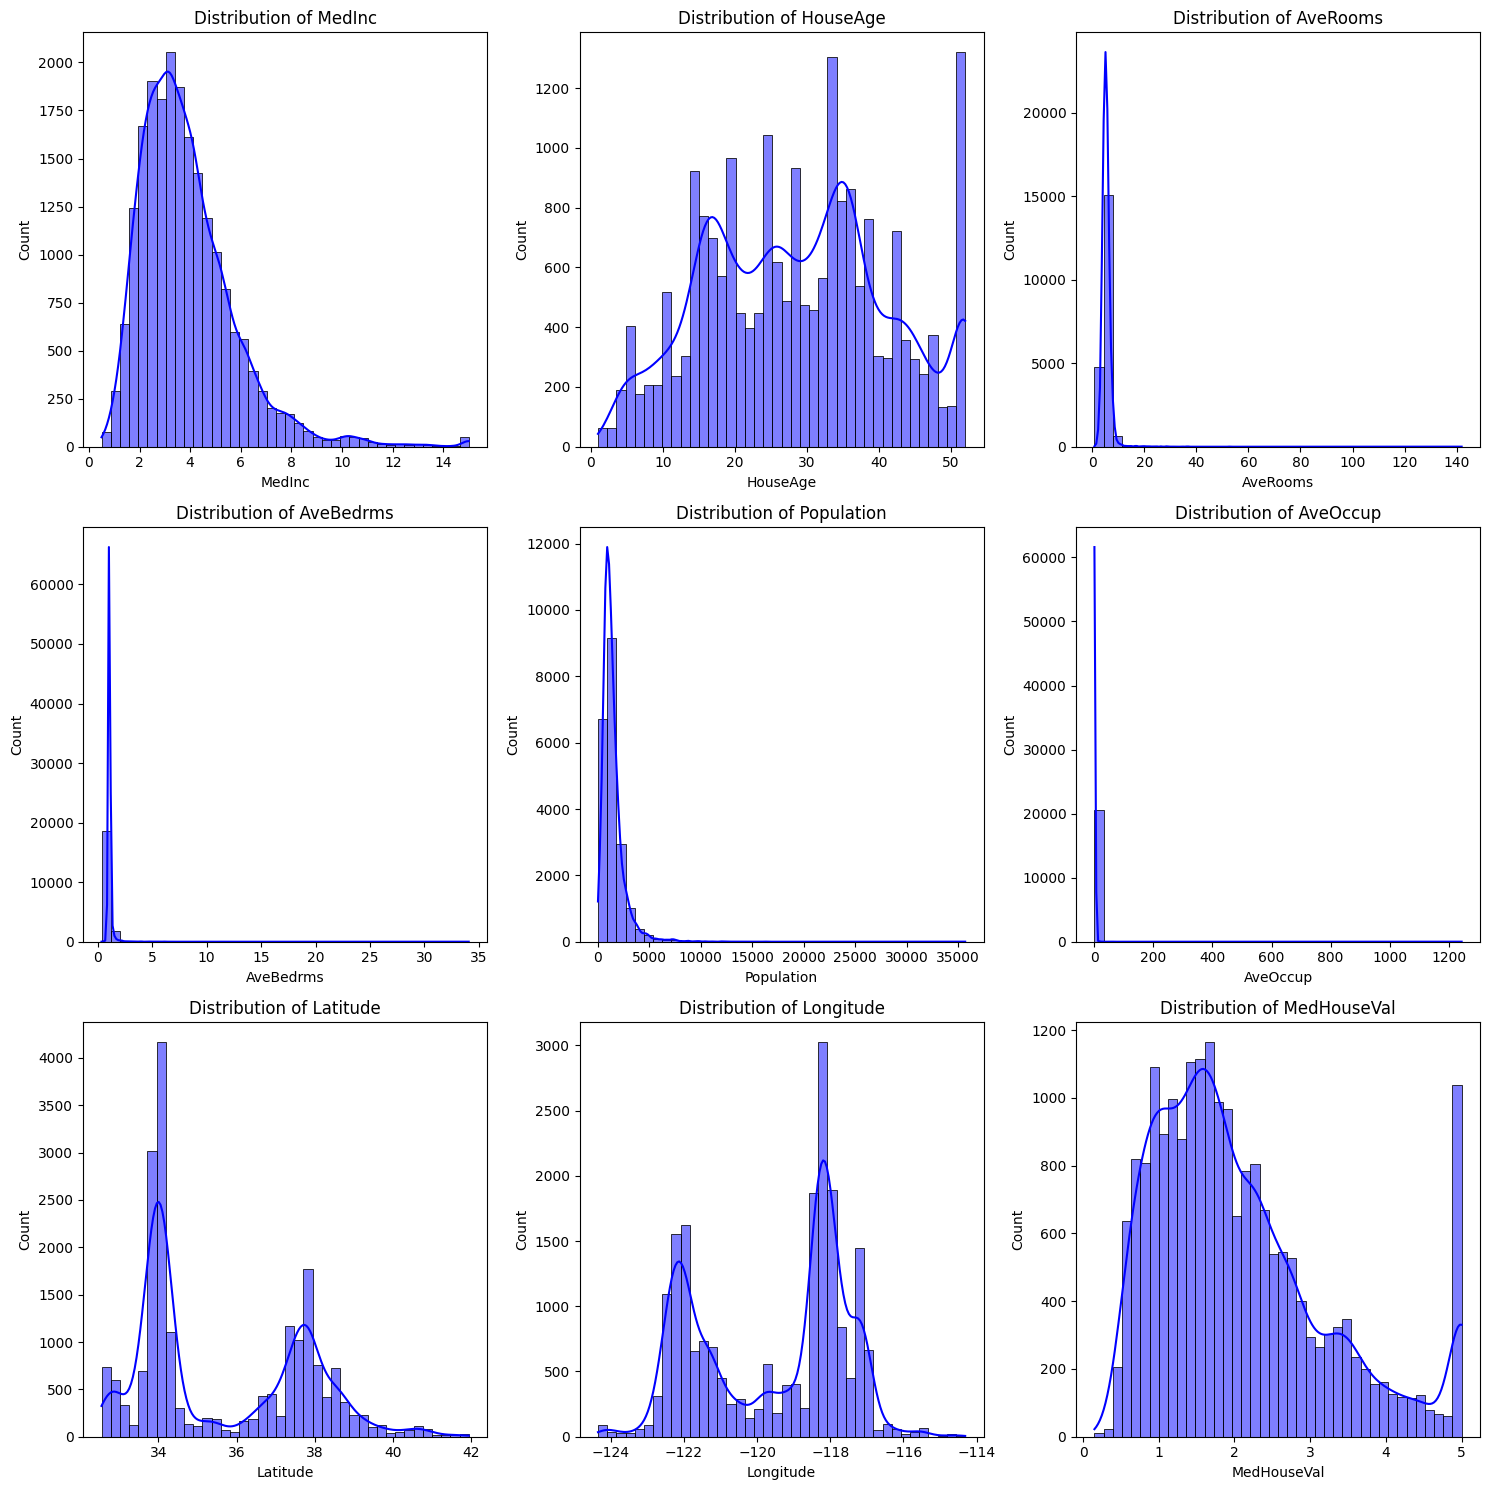

In [ ]:
plt.figure(figsize=(15,5*n_rows))
for i,column in enumerate(numerical_features,1):
    plt.subplot(n_rows,n_cols,i)
    sns.histplot(housing_df[column],kde=True,bins=40,color='blue')
    plt.title(f'Distribution of {column}')
plt.tight_layout()
plt.show()

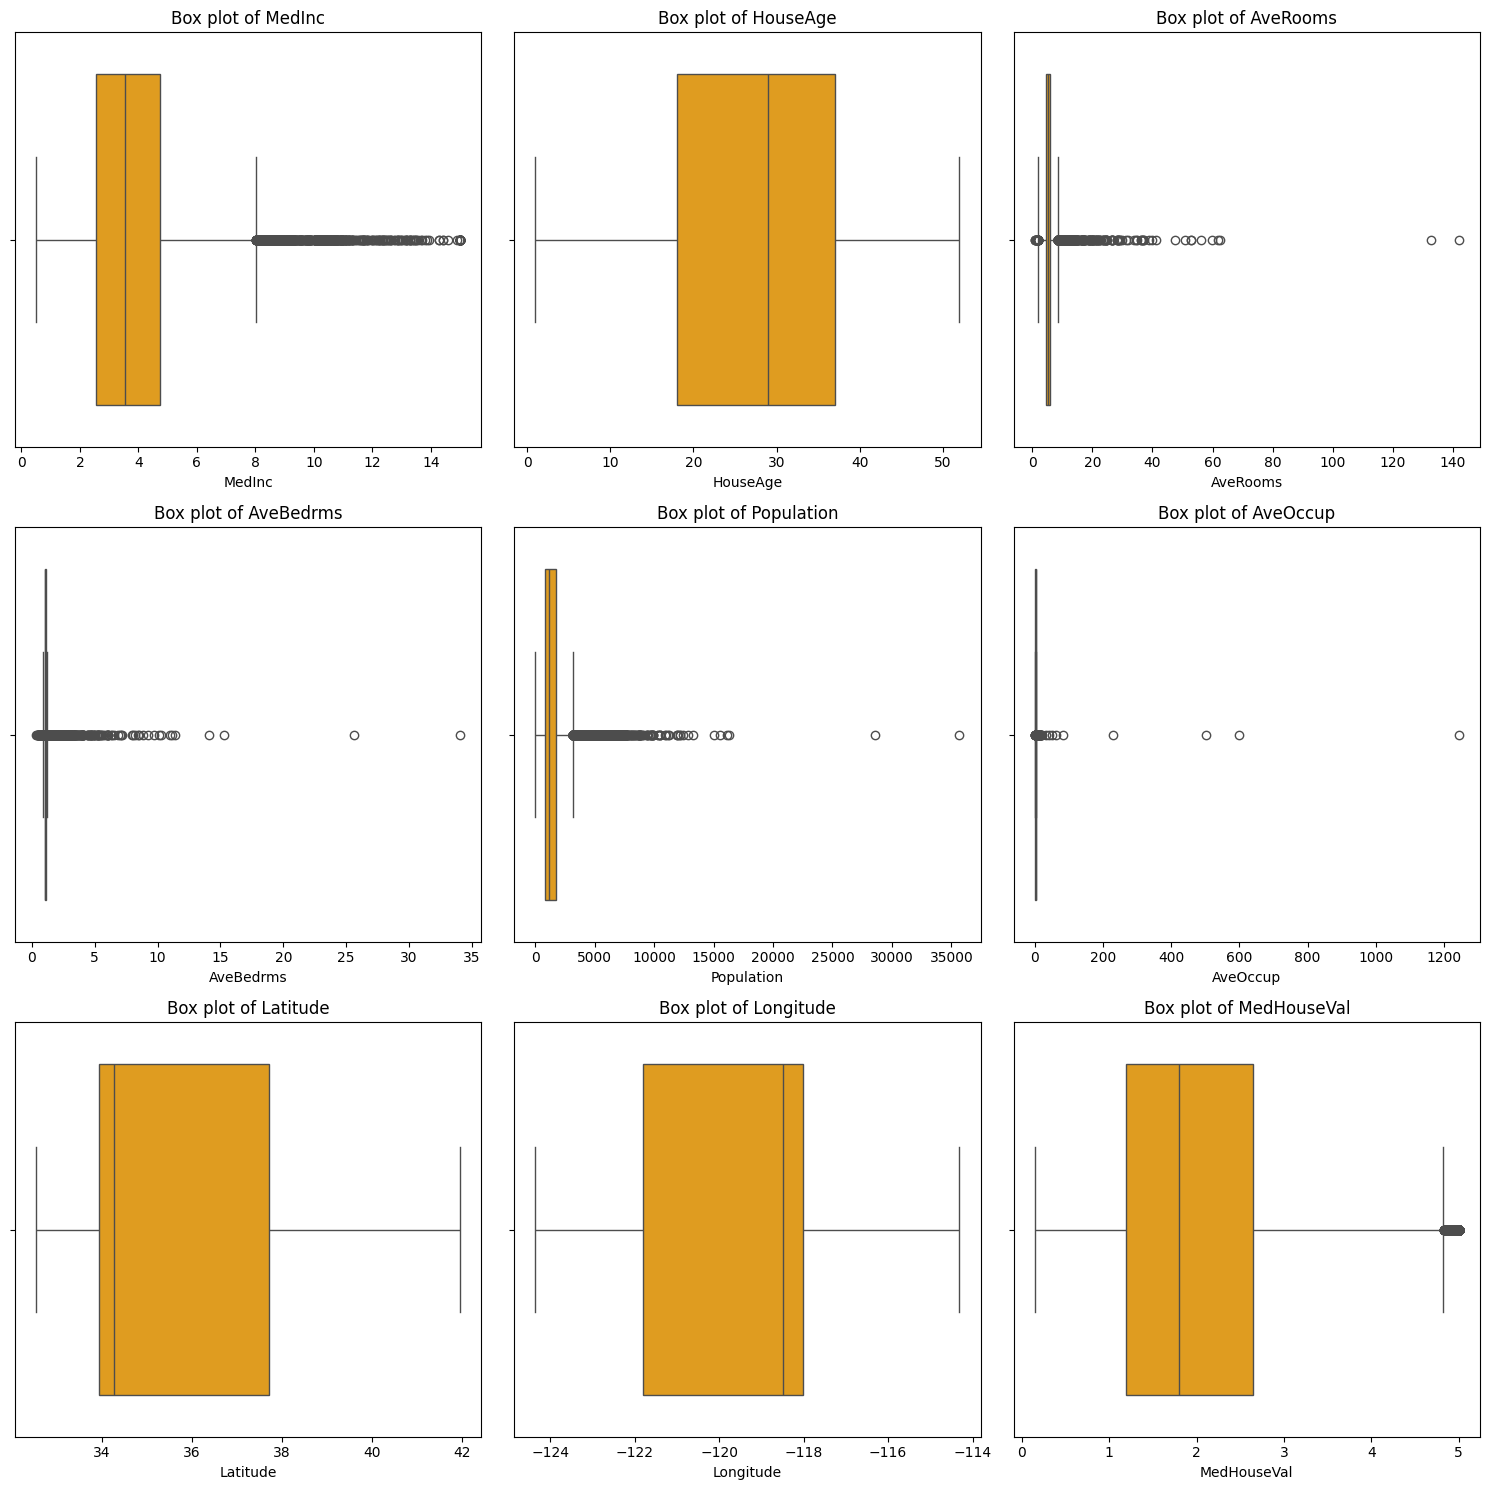

In [8]:
plt.figure(figsize=(15,5*n_rows))
for i,column in enumerate(numerical_features,1):
    plt.subplot(n_rows,n_cols,i)
    sns.boxplot(data=housing_df,x=column,color='orange')
    plt.title(f"Box plot of {column}")
plt.tight_layout()
plt.show()


In [10]:
outlier_summary={}
for column in numerical_features:
    Q1=housing_df[column].quantile(0.25)
    Q3=housing_df[column].quantile(0.75)
    IQR=Q3-Q1
    lower_bound=Q1-1.5*IQR
    upper_bound=Q3+1.5*IQR
    outliers=housing_df[(housing_df[column]<lower_bound)|(housing_df[column]>upper_bound)]
    outlier_summary[column]=len(outliers)

print("Outliers per numerical features")
for v,k in outlier_summary.items():
    print(f"{v}:{k}")

Outliers per numerical features
MedInc:681
HouseAge:0
AveRooms:511
AveBedrms:1424
Population:1196
AveOccup:711
Latitude:0
Longitude:0
MedHouseVal:1071


In [11]:
print(housing_df.describe())

             MedInc      HouseAge  ...     Longitude   MedHouseVal
count  20640.000000  20640.000000  ...  20640.000000  20640.000000
mean       3.870671     28.639486  ...   -119.569704      2.068558
std        1.899822     12.585558  ...      2.003532      1.153956
min        0.499900      1.000000  ...   -124.350000      0.149990
25%        2.563400     18.000000  ...   -121.800000      1.196000
50%        3.534800     29.000000  ...   -118.490000      1.797000
75%        4.743250     37.000000  ...   -118.010000      2.647250
max       15.000100     52.000000  ...   -114.310000      5.000010

[8 rows x 9 columns]
